In [1]:
import pandas as pd
x=pd.read_csv(r"C:\Users\kisho\Downloads\smart_home_device_usage_data.csv")

In [2]:
x

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1
...,...,...,...,...,...,...,...,...
5398,5399,Thermostat,4.556314,5.871764,1,0,28,0
5399,5400,Lights,0.561856,1.555992,1,4,24,0
5400,5401,Smart Speaker,11.096236,7.677779,0,0,42,0
5401,5402,Security System,8.782169,7.467929,0,2,28,1


In [3]:
x.isnull().sum()

UserID                  0
DeviceType              0
UsageHoursPerDay        0
EnergyConsumption       0
UserPreferences         0
MalfunctionIncidents    0
DeviceAgeMonths         0
SmartHomeEfficiency     0
dtype: int64

In [4]:
y=x["DeviceType"].value_counts().reset_index()

In [5]:
y

,DeviceType,count
0,Smart Speaker,1108
1,Camera,1101
2,Lights,1087
3,Security System,1068
4,Thermostat,1039


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

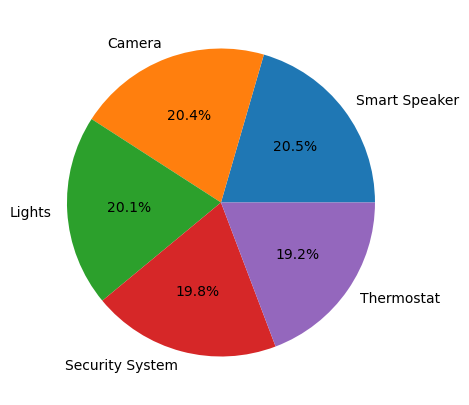

In [7]:
plt.figure(figsize=(12,5))
plt.pie(y["count"],labels=y["DeviceType"],autopct="%1.1f%%")
plt.show()

In [8]:
p=x.groupby(["DeviceType",])[["EnergyConsumption"]].mean().reset_index()

In [9]:
p

,DeviceType,EnergyConsumption
0,Camera,5.080666
1,Lights,5.044884
2,Security System,5.138192
3,Smart Speaker,4.872036
4,Thermostat,5.144356


In [10]:
p1=x.groupby(["DeviceType",])[["UserPreferences"]].mean().reset_index()

In [11]:
p1

,DeviceType,UserPreferences
0,Camera,0.518619
1,Lights,0.514259
2,Security System,0.503745
3,Smart Speaker,0.518953
4,Thermostat,0.502406


In [12]:
x.info

<bound method DataFrame.info of       UserID       DeviceType  UsageHoursPerDay  EnergyConsumption  \
0          1    Smart Speaker         15.307188           1.961607   
1          2           Camera         19.973343           8.610689   
2          3  Security System         18.911535           2.651777   
3          4           Camera          7.011127           2.341653   
4          5           Camera         22.610684           4.859069   
...      ...              ...               ...                ...   
5398    5399       Thermostat          4.556314           5.871764   
5399    5400           Lights          0.561856           1.555992   
5400    5401    Smart Speaker         11.096236           7.677779   
5401    5402  Security System          8.782169           7.467929   
5402    5403       Thermostat         13.540381           9.043076   

      UserPreferences  MalfunctionIncidents  DeviceAgeMonths  \
0                   1                     4               36   

In [13]:
c=pd.get_dummies(x["DeviceType"],drop_first=True).replace({True:1,False:0})

In [14]:
c

,Lights,Security System,Smart Speaker,Thermostat
0,0,0,1,0
1,0,0,0,0
2,0,1,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
5398,0,0,0,1
5399,1,0,0,0
5400,0,0,1,0
5401,0,1,0,0


In [15]:
b=pd.concat([x,c],axis=1)

In [16]:
b.drop(columns=["DeviceType"],inplace=True)

In [17]:
b

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency,Lights,Security System,Smart Speaker,Thermostat
0,1,15.307188,1.961607,1,4,36,1,0,0,1,0
1,2,19.973343,8.610689,1,0,29,1,0,0,0,0
2,3,18.911535,2.651777,1,0,20,1,0,1,0,0
3,4,7.011127,2.341653,0,3,15,0,0,0,0,0
4,5,22.610684,4.859069,1,3,36,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5398,5399,4.556314,5.871764,1,0,28,0,0,0,0,1
5399,5400,0.561856,1.555992,1,4,24,0,1,0,0,0
5400,5401,11.096236,7.677779,0,0,42,0,0,0,1,0
5401,5402,8.782169,7.467929,0,2,28,1,0,1,0,0


In [18]:
import warnings
warnings.filterwarnings("ignore")

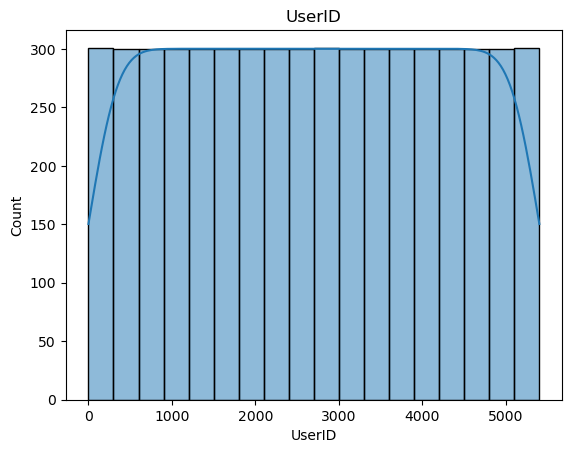

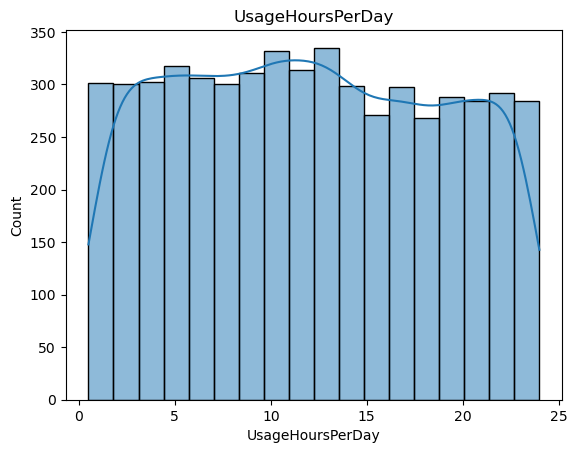

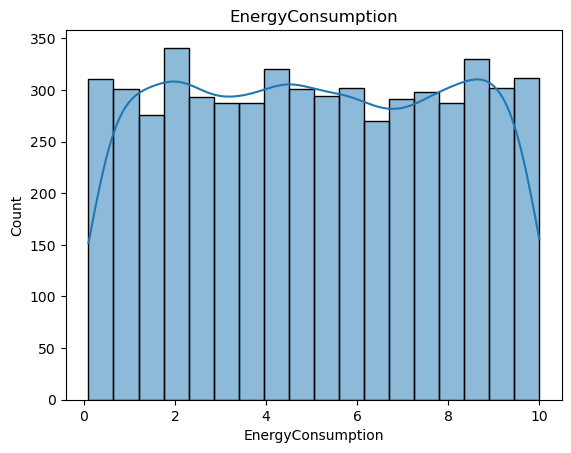

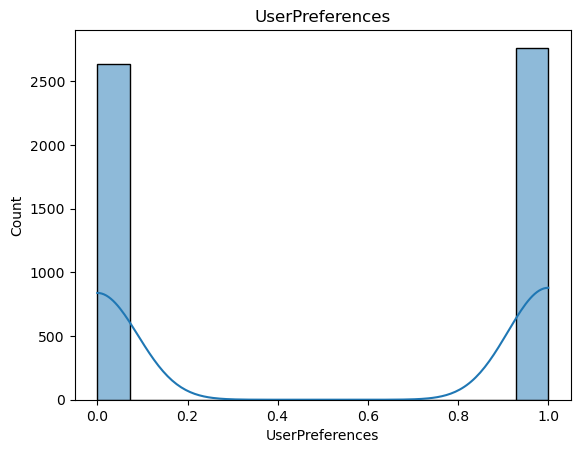

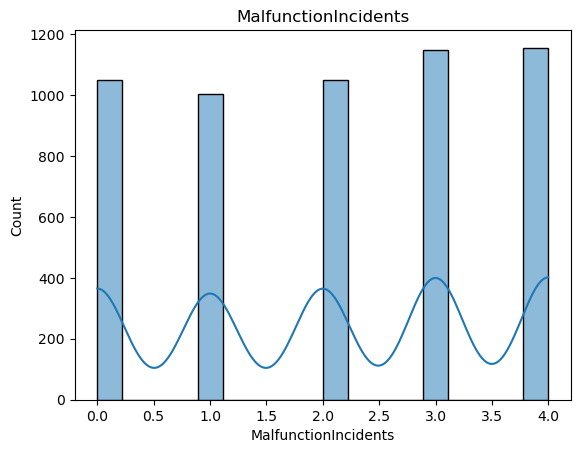

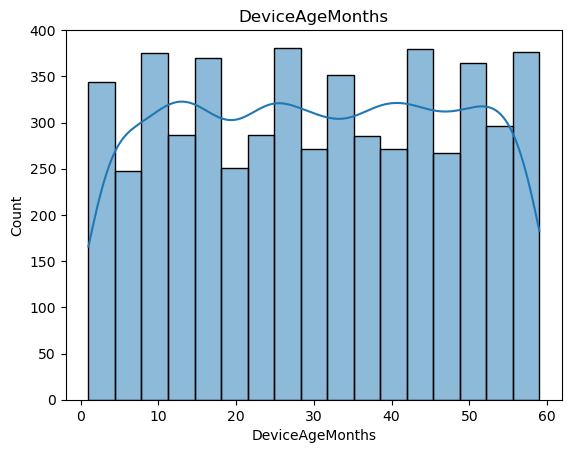

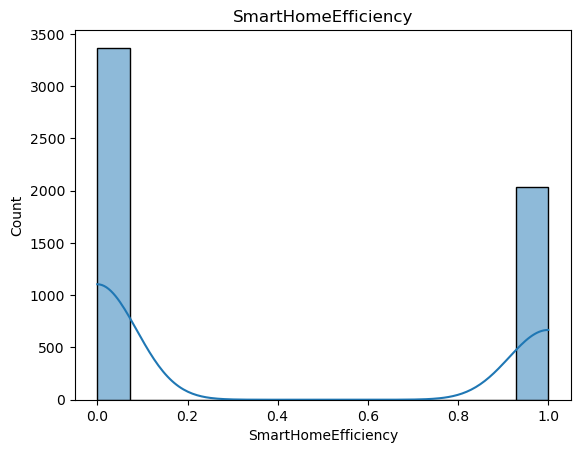

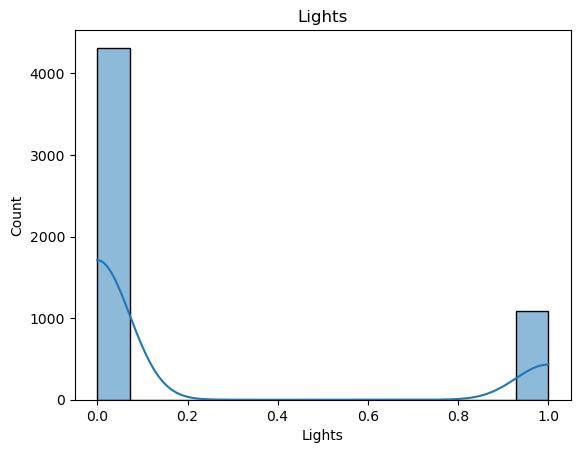

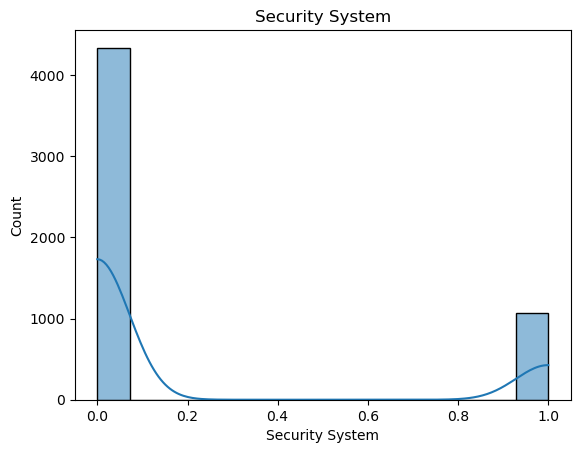

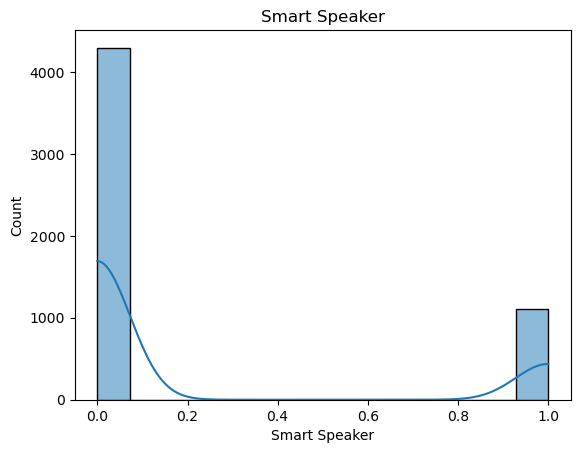

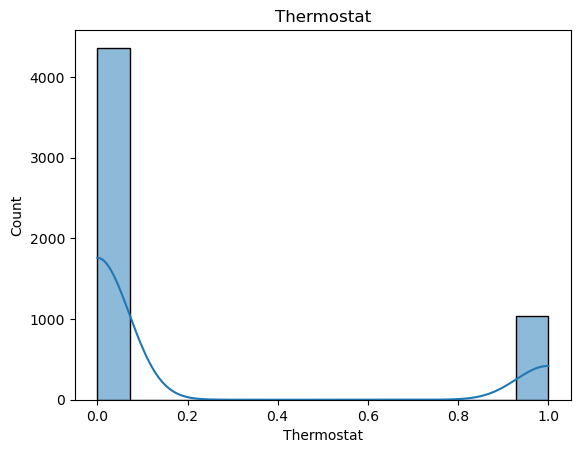

In [19]:
for i in b.columns:
    sns.histplot(b[i],kde=10)
    plt.title(i)
    plt.show()

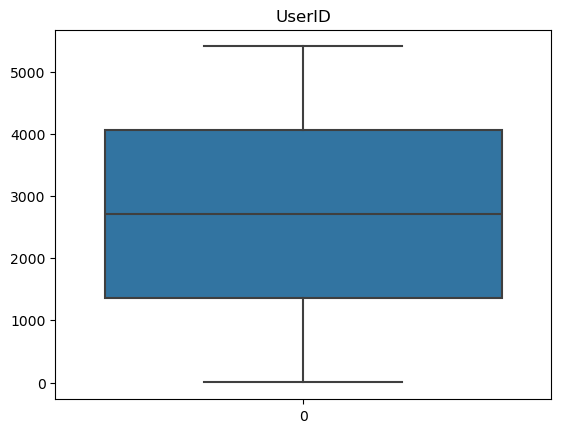

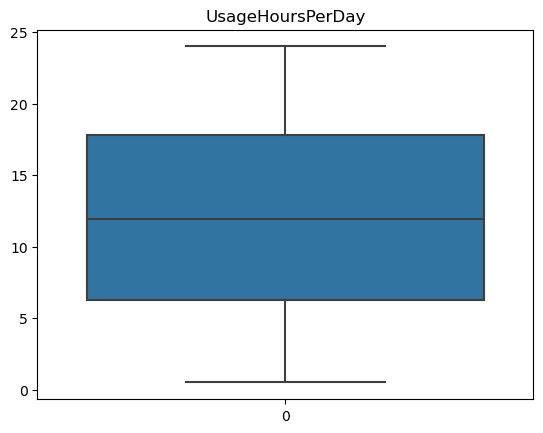

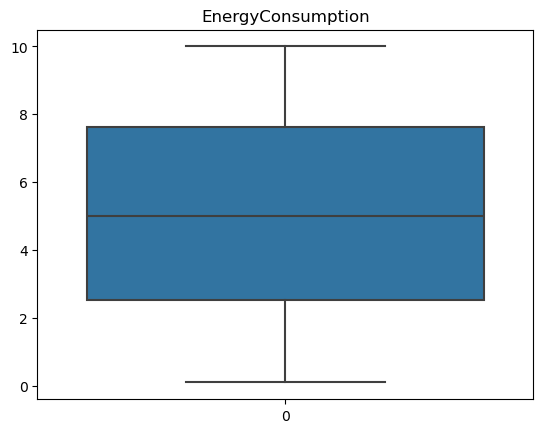

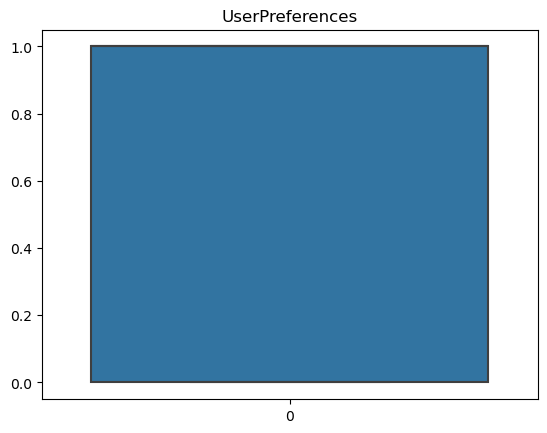

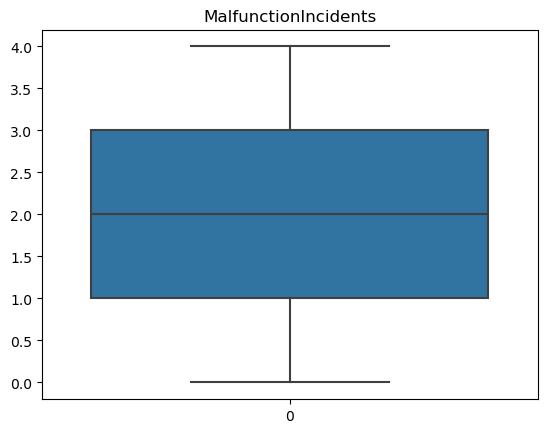

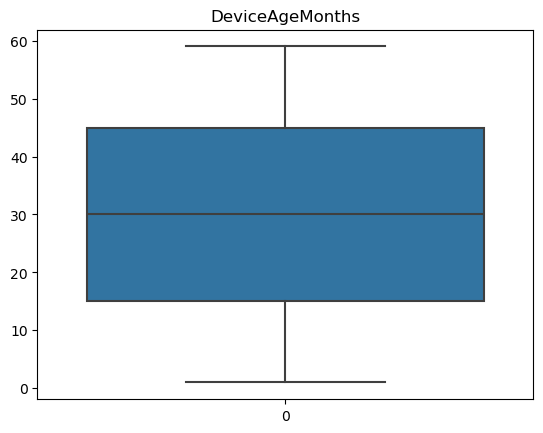

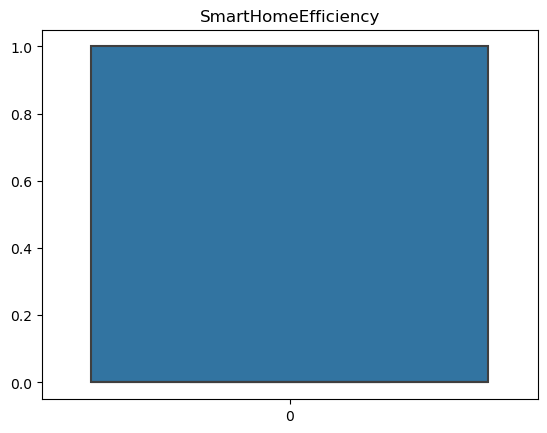

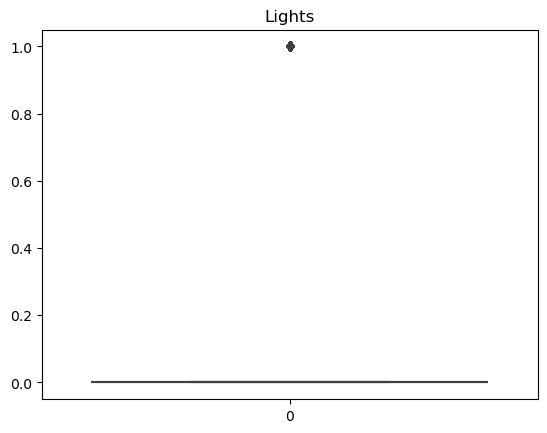

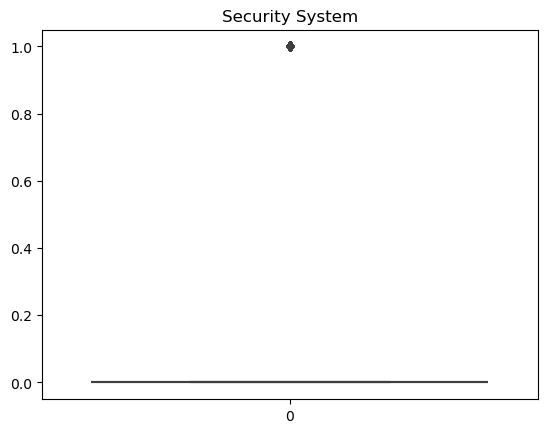

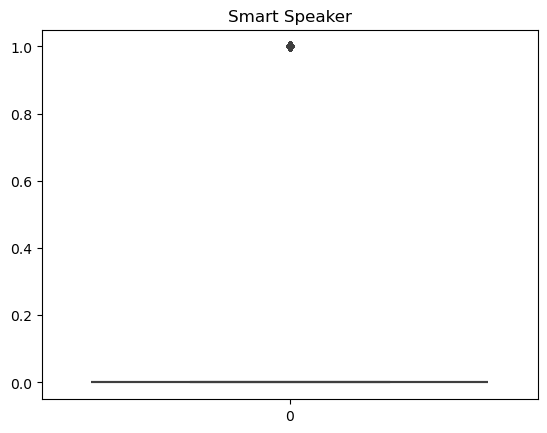

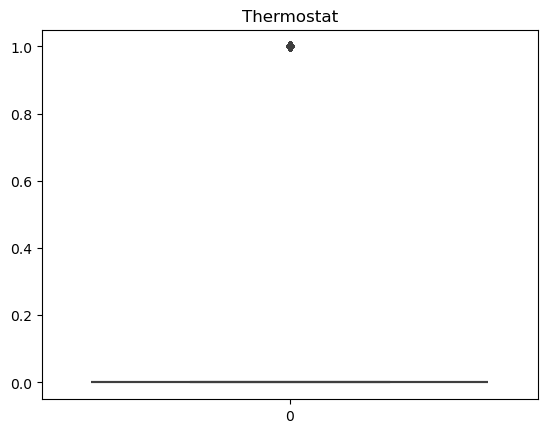

In [20]:
for i in b.columns:
    sns.boxplot(b[i])
    plt.title(i)
    plt.show()

In [21]:
# Logistic

In [22]:
F=b.drop(["SmartHomeEfficiency"],axis=1)

In [23]:
F

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,Lights,Security System,Smart Speaker,Thermostat
0,1,15.307188,1.961607,1,4,36,0,0,1,0
1,2,19.973343,8.610689,1,0,29,0,0,0,0
2,3,18.911535,2.651777,1,0,20,0,1,0,0
3,4,7.011127,2.341653,0,3,15,0,0,0,0
4,5,22.610684,4.859069,1,3,36,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5398,5399,4.556314,5.871764,1,0,28,0,0,0,1
5399,5400,0.561856,1.555992,1,4,24,1,0,0,0
5400,5401,11.096236,7.677779,0,0,42,0,0,1,0
5401,5402,8.782169,7.467929,0,2,28,0,1,0,0


In [24]:
T=x[["SmartHomeEfficiency"]]

In [25]:
T

,SmartHomeEfficiency
0,1
1,1
2,1
3,0
4,1
...,...
5398,0
5399,0
5400,0
5401,1


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(F,T,test_size=0.10,random_state=198)

In [27]:
from sklearn.preprocessing import MinMaxScaler
A1=MinMaxScaler()
x_train["UserID"]=A1.fit_transform(x_train[["UserID"]])

In [28]:
x_train

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,Lights,Security System,Smart Speaker,Thermostat
1832,0.339196,19.342909,8.119686,0,3,19,0,0,0,1
1580,0.292538,22.043766,5.917924,1,3,41,0,0,1,0
3067,0.567858,3.342576,9.251858,1,4,41,0,0,0,1
2243,0.415293,8.351459,6.974123,0,2,3,0,0,0,0
3280,0.607295,17.670957,9.096058,1,0,51,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
722,0.133679,3.350620,6.453577,1,1,9,0,0,0,1
4441,0.822255,3.403954,8.741446,1,2,12,0,0,1,0
105,0.019441,16.255207,6.998276,0,4,1,0,0,0,0
1095,0.202740,23.016246,0.976825,0,4,32,0,0,0,1


In [29]:
x_test["UserID"]=A1.transform(x_test[["UserID"]])
x_test

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,Lights,Security System,Smart Speaker,Thermostat
1471,0.272357,19.840584,9.064140,1,3,10,0,0,0,1
1865,0.345306,1.780968,1.600720,0,4,54,0,1,0,0
432,0.079985,15.101270,9.253766,0,3,13,0,0,1,0
693,0.128310,9.750435,2.037096,1,3,9,1,0,0,0
3716,0.688021,10.146863,3.530301,1,2,12,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4857,0.899278,23.060279,8.903926,1,1,46,0,0,0,0
5330,0.986854,0.935328,5.393130,1,2,45,1,0,0,0
1751,0.324199,20.399448,0.903759,0,3,16,0,0,1,0
3304,0.611739,4.702765,9.594170,1,0,39,1,0,0,0


In [30]:
x_train.shape

(4862, 10)

In [31]:
x_test.shape

(541, 10)

In [32]:
y_train.shape

(4862, 1)

In [33]:
y_test.shape

(541, 1)

# ANN

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(10,),activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [36]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
             metrics=['accuracy'])

In [37]:
model.fit(x_train,y_train,epochs=54)

Epoch 1/54
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6355 - loss: 1.1934
Epoch 2/54
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6135 - loss: 0.6426
Epoch 3/54
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6217 - loss: 0.6250
Epoch 4/54
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6556 - loss: 0.5980
Epoch 5/54
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6649 - loss: 0.5987
Epoch 6/54
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6940 - loss: 0.5830
Epoch 7/54
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7107 - loss: 0.5796
Epoch 8/54
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7325 - loss: 0.5541
Epoch 9/54
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7730 - loss: 0.5180
Epoch 10/54
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7880 - loss: 0.4932
Epoch 11/54
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8039 - loss: 0.4647
Epoch 12/54
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [38]:
T=model.predict(x_test)
T

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[0.9480293 ],
       [0.03204898],
       [0.03185215],
       [0.9698561 ],
       [0.9232829 ],
       [0.0732126 ],
       [0.3482136 ],
       [0.9102446 ],
       [0.04538331],
       [0.0289513 ],
       [0.04024177],
       [0.8316187 ],
       [0.96196485],
       [0.03972801],
       [0.05636751],
       [0.9369123 ],
       [0.25272554],
       [0.06595386],
       [0.92518455],
       [0.13581517],
       [0.5349976 ],
       [0.8656235 ],
       [0.2366338 ],
       [0.46065262],
       [0.12249675],
       [0.06109289],
       [0.92729557],
       [0.08618135],
       [0.9311039 ],
       [0.49227196],
       [0.18337564],
       [0.04284608],
       [0.8609002 ],
       [0.04309064],
       [0.7896682 ],
       [0.962964  ],
       [0.02233321],
       [0.18413639],
       [0.22850849],
       [0.7350148 ],
       [0.07391348],
       [0.9404117 ],
       [0.80262494],
       [0.9738021 ],
       [0.06252915],
       [0.09623336],
       [0.72997403],
       [0.683

In [39]:
pred=[]
for i in T:
    if i>0.5:
        pred.append(1)
    else:
        pred.append(0)

In [40]:
pred

[1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,


In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracy_score(y_test,pred)

0.8927911275415896

In [42]:
confusion_matrix(y_test,pred)

array([[312,  21],
       [ 37, 171]], dtype=int64)

In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       333
           1       0.89      0.82      0.85       208

    accuracy                           0.89       541
   macro avg       0.89      0.88      0.88       541
weighted avg       0.89      0.89      0.89       541



In [44]:
model.evaluate(x_train,y_train)

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8771 - loss: 0.3032


[0.29709330201148987, 0.8842040300369263]

In [45]:
model.evaluate(x_test,y_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.8893 - loss: 0.2769


[0.27820196747779846, 0.8927911520004272]

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
L=LogisticRegression()
from sklearn.model_selection import GridSearchCV
params={"C":[0.1,0.2,0.02,0.001],"penalty":["l1","l2"]}
G=GridSearchCV(L,param_grid=params,scoring="accuracy",cv=7)

In [47]:
L.fit(x_train,y_train)

LogisticRegression()

In [48]:
G.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.2, 0.02, 0.001], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [49]:
G.best_params_

{'C': 0.2, 'penalty': 'l2'}

In [50]:
model=G.best_estimator_

In [51]:
model

LogisticRegression(C=0.2)

In [52]:
pred=G.predict(x_test)

In [53]:
pred

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [54]:
y_test

,SmartHomeEfficiency
1471,1
1865,0
432,0
693,1
3716,1
...,...
4857,0
5330,1
1751,0
3304,0


In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [56]:
confusion_matrix(y_test,pred)

array([[304,  29],
       [ 24, 184]], dtype=int64)

In [57]:
accuracy_score(y_test,pred)

0.9020332717190388

In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       333
           1       0.86      0.88      0.87       208

    accuracy                           0.90       541
   macro avg       0.90      0.90      0.90       541
weighted avg       0.90      0.90      0.90       541



In [59]:
model.score(x_train,y_train)

0.8724804607157548

In [60]:
model.score(x_test,y_test)

0.9020332717190388

# SVC

In [61]:
from sklearn.svm import SVC
s=SVC()
from sklearn.model_selection import GridSearchCV
params={"C":[.1,.2,.02,0.006,0.9],"gamma":[.1,.07,.01,1],"kernel":["rbf"]}
G=GridSearchCV(s,param_grid=params,scoring="accuracy",cv=7)

In [62]:
G.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.02, 0.006, 0.9],
                         'gamma': [0.1, 0.07, 0.01, 1], 'kernel': ['rbf']},
             scoring='accuracy')

In [63]:
G.best_params_

{'C': 0.9, 'gamma': 0.01, 'kernel': 'rbf'}

In [64]:
model=G.best_estimator_

In [65]:
pred2=model.predict(x_test)

In [66]:
pred2

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [67]:
y_test

,SmartHomeEfficiency
1471,1
1865,0
432,0
693,1
3716,1
...,...
4857,0
5330,1
1751,0
3304,0


In [68]:
confusion_matrix(pred2,y_test)

array([[316,  51],
       [ 17, 157]], dtype=int64)

In [69]:
accuracy_score(pred2,y_test)

0.8743068391866913

In [70]:
print(classification_report(pred2,y_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       367
           1       0.75      0.90      0.82       174

    accuracy                           0.87       541
   macro avg       0.85      0.88      0.86       541
weighted avg       0.89      0.87      0.88       541



In [71]:
model.score(x_train,y_train)

0.8922254216371863

In [72]:
model.score(x_test,y_test)


0.8743068391866913

# KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
H=KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
G=GridSearchCV(H,param_grid={"n_neighbors":[3,5,7,9]},scoring="accuracy",cv=5)

In [74]:
G.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='accuracy')

In [75]:
G.best_params_

{'n_neighbors': 9}

In [76]:
model1=G.best_estimator_

In [77]:
model1

KNeighborsClassifier(n_neighbors=9)

In [78]:
pred3=model1.predict(x_train)

In [79]:
pred3

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [80]:
y_test

,SmartHomeEfficiency
1471,1
1865,0
432,0
693,1
3716,1
...,...
4857,0
5330,1
1751,0
3304,0


In [81]:
model1.score(x_train,y_train)

0.7986425339366516

In [82]:
model1.score(x_test,y_test)

0.7134935304990758

# Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
D=DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
params={"max_depth":[5,6,7,8],"criterion":["gini"],"min_samples_split":[5,6,7,8]}
G2=GridSearchCV(D,param_grid=params,scoring="accuracy",cv=7)

In [84]:
G2.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [5, 6, 7, 8],
                         'min_samples_split': [5, 6, 7, 8]},
             scoring='accuracy')

In [85]:
G2.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 5}

In [86]:
model6=G2.best_estimator_

In [87]:
model6

DecisionTreeClassifier(max_depth=7, min_samples_split=5)

In [88]:
pred6=model6.predict(x_test)

In [89]:
pred6

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [90]:
y_test

,SmartHomeEfficiency
1471,1
1865,0
432,0
693,1
3716,1
...,...
4857,0
5330,1
1751,0
3304,0


In [91]:
confusion_matrix(y_test,pred6)

array([[320,  13],
       [  7, 201]], dtype=int64)

In [92]:
accuracy_score(y_test,pred6)

0.9630314232902033

In [93]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       333
           1       0.94      0.97      0.95       208

    accuracy                           0.96       541
   macro avg       0.96      0.96      0.96       541
weighted avg       0.96      0.96      0.96       541



In [94]:
model6.score(x_train,y_train)

0.9757301522007404

In [95]:
model6.score(x_test,y_test)

0.9630314232902033

# Naive Bayes

In [96]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,ComplementNB
Z=GaussianNB()
M=MultinomialNB()
B=BernoulliNB()
C=ComplementNB()


In [97]:
Z.fit(x_train,y_train)

GaussianNB()

In [98]:
Z.score(x_train,y_train)

0.8313451254627725

In [99]:
Z.score(x_test,y_test)

0.8650646950092421

In [100]:
M.fit(x_train,y_train)

MultinomialNB()

In [101]:
M.score(x_train,y_train)

0.6986836692719046

In [102]:
M.score(x_test,y_test)

0.6802218114602587

In [103]:
B.fit(x_train,y_train)

BernoulliNB()

In [104]:
B.score(x_train,y_train)

0.7875359934183463

In [105]:
B.score(x_test,y_test)

0.8317929759704251

In [106]:
C.fit(x_train,y_train)

ComplementNB()

In [107]:
C.score(x_train,y_train)

0.6772932949403537

In [108]:
C.score(x_test,y_test)

0.6839186691312384

# Bagging

In [109]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
A=RandomForestClassifier(n_estimators=25)
A.fit(x_train,y_train)

RandomForestClassifier(n_estimators=25)

In [110]:
B=BaggingClassifier(estimator=SVC(),n_estimators=60)
B.fit(x_train,y_train)

BaggingClassifier(estimator=SVC(), n_estimators=60)

In [111]:
B.score(x_train,y_train)

0.851090086384204

In [112]:
B.score(x_test,y_test)

0.8373382624768947

# Voting

In [113]:
from sklearn.ensemble import VotingClassifier
C=VotingClassifier(estimators=[("LogReg",LogisticRegression()),("NB",GaussianNB()),("SVC",SVC())])
C.fit(x_train,y_train)

VotingClassifier(estimators=[('LogReg', LogisticRegression()),
                             ('NB', GaussianNB()), ('SVC', SVC())])

In [114]:
C.score(x_train,y_train)

0.8798848210612916

In [115]:
C.score(x_test,y_test)

0.9057301293900185

# Stacking

In [116]:
from sklearn.ensemble import StackingClassifier
M=StackingClassifier(estimators=[("LogReg",LogisticRegression()),("NB",GaussianNB()),("SVC",SVC())],final_estimator=KNeighborsClassifier())
M.fit(x_train,y_train)

StackingClassifier(estimators=[('LogReg', LogisticRegression()),
                               ('NB', GaussianNB()), ('SVC', SVC())],
                   final_estimator=KNeighborsClassifier())

In [117]:
M.score(x_train,y_train)

0.8772110242698478

In [118]:
M.score(x_test,y_test)

0.8743068391866913

# Boosting

In [119]:
from sklearn.ensemble import AdaBoostClassifier
A2=AdaBoostClassifier(n_estimators=50)
A2.fit(x_train,y_train)

AdaBoostClassifier()

In [120]:
A2.score(x_train,y_train)                                                                                            # training data accuracy

0.9430275606746195

In [121]:
A2.score(x_test,y_test)                                                                                              # testing data accuracy

0.9482439926062847

In [122]:
FG={"models":["Logistic","SVC","KNN","Decision Tree","GaussianNB","MultinomialNB","BernoulliNB","ComplementNB","Bagging","Voting","Stacking","Boosting"],"Train":[0.87,0.89,0.79,0.97,0.83,0.69,0.78,0.67,0.85,0.87,0.87,0.94],"Test":[0.90,0.87,0.71,0.97,0.86,0.68,0.83,0.68,0.83,0.90,0.87,0.94]}

In [123]:
FG=pd.DataFrame(FG)

In [124]:
FG

,models,Train,Test
0,Logistic,0.87,0.90
1,SVC,0.89,0.87
2,KNN,0.79,0.71
3,Decision Tree,0.97,0.97
4,GaussianNB,0.83,0.86
5,MultinomialNB,0.69,0.68
6,BernoulliNB,0.78,0.83
7,ComplementNB,0.67,0.68
8,Bagging,0.85,0.83
9,Voting,0.87,0.90


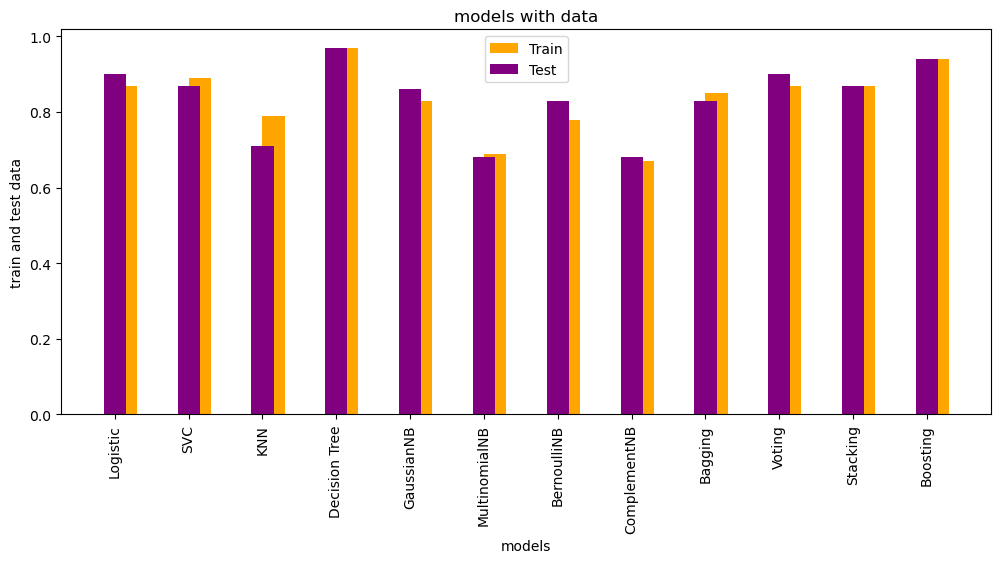

In [125]:
plt.figure(figsize=(12,5))
plt.bar(FG["models"],FG["Train"],color="orange",width=0.3,align="edge",label="Train")
plt.bar(FG["models"],FG["Test"],color="purple",width=0.3,align="center",label="Test")
plt.title("models with data")
plt.xlabel("models")
plt.ylabel("train and test data")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [126]:
# logistic and voting working fine